<a href="https://colab.research.google.com/github/skdding3/Basic_statistic/blob/main/Stats_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

help(sm.add_constant)

#현재경로 확인
print(os.getcwd())

Help on function add_constant in module statsmodels.tools.tools:

add_constant(data, prepend=True, has_constant='skip')
    Adds a column of ones to an array
    
    Parameters
    ----------
    data : array-like
        ``data`` is the column-ordered design matrix
    prepend : bool
        If true, the constant is in the first column.  Else the constant is
        appended (last column).
    has_constant : str {'raise', 'add', 'skip'}
        Behavior if ``data`` already has a constant. The default will return
        data without adding another constant. If 'raise', will raise an
        error if a constant is present. Using 'add' will duplicate the
        constant, if one is present.
    
    Returns
    -------
    data : array, recarray or DataFrame
        The original values with a constant (column of ones) as the first or
        last column. Returned value depends on input type.
    
    Notes
    -----
    When the input is recarray or a pandas Series or DataFrame, the ad

In [7]:
#데이터불러오기
corolia = pd.read_csv("/content/ToyotaCorolla.csv")

#데이터확인
print(corolia.head())



   Id                                           Model  ...  Radio_cassette  Tow_Bar
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
2   3  ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  ...               0        0
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  ...               0        0

[5 rows x 37 columns]


In [10]:
#데이터 수와 변수의 수 확인하기
nCar = corolia.shape[0]
nVar = corolia.shape[1]

print(nCar,nVar)

#범주형 변수를 이진형 변수( 0 ,1 )로 변환



1436 37


In [11]:

#변수안에 범주형 변수가 있는지 확인
print(corolia.Fuel_Type.unique())

#가변수 생성
dummy_p = np.repeat(0,nCar)
dummy_d = np.repeat(0,nCar)
dummy_c = np.repeat(0,nCar)

#인덱스 슬라이싱 후 1 대입
p_idx = np.array(corolia.Fuel_Type=="Petrol")
d_idx = np.array(corolia.Fuel_Type=="Diesel")
c_idx = np.array(corolia.Fuel_Type=="CNG")

#print(p_idx,d_idx,c_idx)

dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

#불필요한 변수 제거 및 가변수 추가
Fuel = pd.DataFrame({"Petrol":dummy_p, "Diesel": dummy_d, "CNG":dummy_c})

print(Fuel)

['Diesel' 'Petrol' 'CNG']
      Petrol  Diesel  CNG
0          0       1    0
1          0       1    0
2          0       1    0
3          0       1    0
4          0       1    0
...      ...     ...  ...
1431       1       0    0
1432       1       0    0
1433       1       0    0
1434       1       0    0
1435       1       0    0

[1436 rows x 3 columns]


In [4]:

corolia_ = corolia.drop(["Id","Model","Fuel_Type"],axis=1,inplace=False)
mlrData = pd.concat((corolia_,Fuel),1)
print(mlrData.head())


#bias 추가

#상수항 추가 ( 상수항 추가는 한번 더 실행시키면 추가가 더 된다 주의!!)
mlrData = sm.add_constant(mlrData,has_constant="add")
print(mlrData.head())



   Price  Age_08_04  Mfg_Month  Mfg_Year  ...  Tow_Bar  Petrol  Diesel  CNG
0  13500         23         10      2002  ...        0       0       1    0
1  13750         23         10      2002  ...        0       0       1    0
2  13950         24          9      2002  ...        0       0       1    0
3  14950         26          7      2002  ...        0       0       1    0
4  13750         30          3      2002  ...        0       0       1    0

[5 rows x 37 columns]
   const  Price  Age_08_04  Mfg_Month  ...  Tow_Bar  Petrol  Diesel  CNG
0    1.0  13500         23         10  ...        0       0       1    0
1    1.0  13750         23         10  ...        0       0       1    0
2    1.0  13950         24          9  ...        0       0       1    0
3    1.0  14950         26          7  ...        0       0       1    0
4    1.0  13750         30          3  ...        0       0       1    0

[5 rows x 38 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


    VIF Factor          features
0     0.000000             const
1    10.953474             Price
2          inf         Age_08_04
3          inf         Mfg_Month
4          inf          Mfg_Year
5     2.400334                KM
6     2.621514                HP
7     1.143778         Met_Color
8     1.121303         Automatic
9     1.258641                cc
10    1.352288             Doors
11    0.000000         Cylinders
12    1.271814             Gears
13    5.496805     Quarterly_Tax
14    4.487491            Weight
15    1.210815     Mfr_Guarantee
16    1.392485   BOVAG_Guarantee
17    1.573026  Guarantee_Period
18    2.276617               ABS
19    1.612758          Airbag_1
20    3.106933          Airbag_2
21    1.846429             Airco
22    2.009866   Automatic_airco
23    2.647036     Boardcomputer
24    1.564446         CD_Player
25    4.593157      Central_Lock
26    4.676311   Powered_Windows
27    1.582829    Power_Steering
28   62.344621             Radio
29    2.07

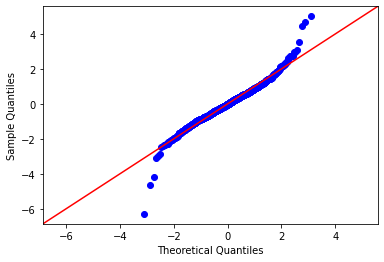

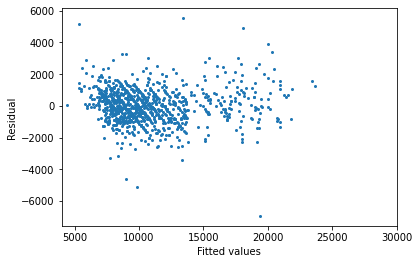

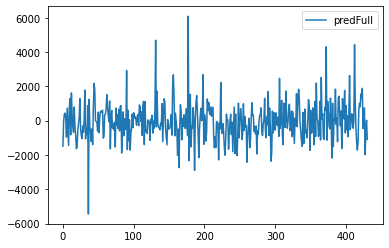

1248363.723710299


In [12]:
#설명변수(X) ,타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

featureColums = list(mlrData.columns.difference(["Price"]))

x = mlrData[featureColums]
y = mlrData.Price

trainX ,testX , trainY , testY = train_test_split(x,y,train_size=0.7,test_size=0.3)
#print(trainX.shape,testX.shape,trainY.shape,testY.shape)

#Train the MLR / 회귀모델적합
fullModel = sm.OLS(trainY,trainX)
fittedFullModel = fullModel.fit()

#R-Squre 가 높고 , 대부분의 변수들이 유의함.
#print(fittedFullModel.summary())

#VIF를 통한 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(mlrData.values,i)
                     for i in range(mlrData.shape[1])]
vif["features"]=mlrData.columns

print(vif)

#학습데이터의 잔차 확인

res = fittedFullModel.resid
import matplotlib.pyplot as plt
#Q-Q plot # 정규분포확인
fig = sm.qqplot(res, fit=True, line='45')
plt.show()
# residual pattern 확인

predY = fittedFullModel.predict(trainX)

fig = plt.scatter(predY,res,s=4)
plt.xlim(4000,30000)
plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

#검증 데이터에 대한 예측

predY2 = fittedFullModel.predict(testX)

plt.plot(np.array(testY-predY2),label="predFull")
plt.legend()
plt.show()

#MSE 값 구하기
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_true=testY,y_pred=predY2)
print(MSE)
